**В данном блокноте продемонстрирована работа KAN на расширенном датасете ирисов Фишера.**

*   Расишренный датасет включает в себя набор из 1200 объектов. Обучение производилось на 80% выборки.
*   Размерность датасета была понижена, сеть обучалась на 5-мерной выборке. Были выбраны признаки: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'elevation'.
*   Сеть имеет 3 слоя: [5, 11, 3], где 5 - размерность пространства признаков, 3 - количество классов, 10 - по изначальной теореме Колмогорова-Арнольда размерность второго слоя KAN = 2 * 5 + 1
*   По графикам наглядно видно соответствие результата классификации



In [ ]:
pip install pykan

In [ ]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('iris_extended.csv')
data.head()

species  elevation soil_type  sepal_length  sepal_width  petal_length  \
0  setosa      161.8     sandy          5.16         3.41          1.64   
1  setosa      291.4      clay          5.48         4.05          1.53   
2  setosa      144.3     sandy          5.10         2.80          1.47   
3  setosa      114.6      clay          4.64         3.44          1.53   
4  setosa      110.9     loamy          4.85         2.87          1.23   

   petal_width  sepal_area  petal_area  sepal_aspect_ratio  ...  \
0         0.26     17.5956      0.4264            1.513196  ...   
1         0.37     22.1940      0.5661            1.353086  ...   
2         0.38     14.2800      0.5586            1.821429  ...   
3         0.17     15.9616      0.2601            1.348837  ...   
4         0.26     13.9195      0.3198            1.689895  ...   

   sepal_to_petal_length_ratio  sepal_to_petal_width_ratio  \
0                     3.146341                   13.115385   
1                     3.581699                   10.945946   
2                     3.469388                    7.368421   
3                     3.032680                   20.235294   
4                     3.943089                   11.038462   

   sepal_petal_length_diff  sepal_petal_width_diff  petal_curvature_mm  \
0                     3.52                    3.15                5.33   
1                     3.95                    3.68                5.90   
2                     3.63                    2.42                5.66   
3                     3.11                    3.27                4.51   
4                     3.62                    2.61                4.03   

   petal_texture_trichomes_per_mm2  leaf_area_cm2  sepal_area_sqrt  \
0                            18.33          53.21         4.194711   
1                            20.45          52.53         4.711051   
2                            24.62          50.25         3.778889   
3                            22.91          50.85         3.995197   
4                            21.56          40.57         3.730885   

   petal_area_sqrt  area_ratios  
0         0.652993    41.265478  
1         0.752396    39.205087  
2         0.747395    25.563910  
3         0.510000    61.367166  
4         0.565509    43.525641  

[5 rows x 21 columns]

In [ ]:
data.loc[data['species'] == 'setosa', 'species'] = 0

In [ ]:
data.loc[data['species'] == 'virginica', 'species'] = 1

In [ ]:
data.loc[data['species'] == 'versicolor', 'species'] = 2

In [ ]:
data

species  elevation soil_type  sepal_length  sepal_width  petal_length  \
0          0      161.8     sandy          5.16         3.41          1.64   
1          0      291.4      clay          5.48         4.05          1.53   
2          0      144.3     sandy          5.10         2.80          1.47   
3          0      114.6      clay          4.64         3.44          1.53   
4          0      110.9     loamy          4.85         2.87          1.23   
...      ...        ...       ...           ...          ...           ...   
1195       1      268.8     loamy          5.36         2.51          5.16   
1196       1      125.4      clay          7.49         3.06          7.68   
1197       1       73.6      clay          6.79         3.25          4.72   
1198       1      239.6     sandy          6.38         2.24          5.30   
1199       1      201.5     loamy          5.16         3.20          5.64   

      petal_width  sepal_area  petal_area  sepal_aspect_ratio  ...  \
0            0.26     17.5956      0.4264            1.513196  ...   
1            0.37     22.1940      0.5661            1.353086  ...   
2            0.38     14.2800      0.5586            1.821429  ...   
3            0.17     15.9616      0.2601            1.348837  ...   
4            0.26     13.9195      0.3198            1.689895  ...   
...           ...         ...         ...                 ...  ...   
1195         1.93     13.4536      9.9588            2.135458  ...   
1196         2.17     22.9194     16.6656            2.447712  ...   
1197         2.26     22.0675     10.6672            2.089231  ...   
1198         1.71     14.2912      9.0630            2.848214  ...   
1199         1.43     16.5120      8.0652            1.612500  ...   

      sepal_to_petal_length_ratio  sepal_to_petal_width_ratio  \
0                        3.146341                   13.115385   
1                        3.581699                   10.945946   
2                        3.469388                    7.368421   
3                        3.032680                   20.235294   
4                        3.943089                   11.038462   
...                           ...                         ...   
1195                     1.038760                    1.300518   
1196                     0.975260                    1.410138   
1197                     1.438559                    1.438053   
1198                     1.203774                    1.309942   
1199                     0.914894                    2.237762   

      sepal_petal_length_diff  sepal_petal_width_diff  petal_curvature_mm  \
0                        3.52                    3.15                5.33   
1                        3.95                    3.68                5.90   
2                        3.63                    2.42                5.66   
3                        3.11                    3.27                4.51   
4                        3.62                    2.61                4.03   
...                       ...                     ...                 ...   
1195                     0.20                    0.58               11.61   
1196                    -0.19                    0.89               13.85   
1197                     2.07                    0.99               13.13   
1198                     1.08                    0.53               11.01   
1199                    -0.48                    1.77               12.09   

      petal_texture_trichomes_per_mm2  leaf_area_cm2  sepal_area_sqrt  \
0                               18.33          53.21         4.194711   
1                               20.45          52.53         4.711051   
2                               24.62          50.25         3.778889   
3                               22.91          50.85         3.995197   
4                               21.56          40.57         3.730885   
...                               ...            ...              ...   
1195      

In [ ]:
tens_data = torch.tensor(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'elevation']].values)

In [ ]:
tens_labels = torch.tensor(data['species'].values.astype(int))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tens_data, tens_labels, test_size=0.2, random_state=42)

In [ ]:
model = KAN(width=[5, 11, 3], k=3, grid=3)

In [ ]:
dataset = {}
dataset['train_input'] = X_train
dataset['test_input'] = X_test
dataset['train_label'] = y_train
dataset['test_label'] = y_test

In [ ]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=50, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());
results['train_acc'][-1], results['test_acc'][-1]

train loss: 2.84e-01 | test loss: 2.51e-01 | reg: 6.78e+01 : 100%|██| 50/50 [02:29<00:00,  3.00s/it]


(0.9645833373069763, 0.987500011920929)

In [ ]:
res = model(tens_data)
res_lst = res.tolist()
res_lst = [x.index(max(x)) for x in res_lst]
res = torch.tensor(res_lst)
res

tensor([0, 0, 0,  ..., 1, 1, 1])

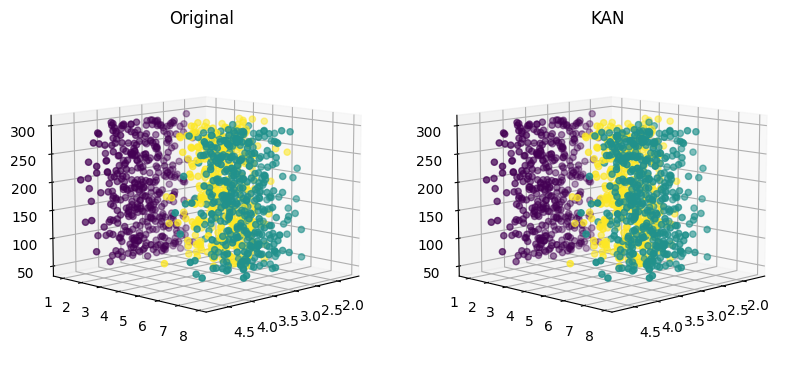

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection="3d", elev=10, azim=45)
ax1.set_title("Original")
scatter1 = ax1.scatter(xs=tens_data[:, 1], ys=tens_data[:, 2], zs=tens_data[:, 4], c=tens_labels)

ax2 = fig.add_subplot(1, 2, 2, projection="3d", elev=10, azim=45)
ax2.set_title("KAN")
scatter2 = ax2.scatter(xs=tens_data[:, 1], ys=tens_data[:, 2], zs=tens_data[:, 4], c=res)


In [ ]:
def update(frame):
    ax1.view_init(frame/8, frame)
    ax2.view_init(frame/8, frame)
    return scatter1, scatter2

ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 360), blit=True, interval=33)

HTML(ani.to_html5_video())

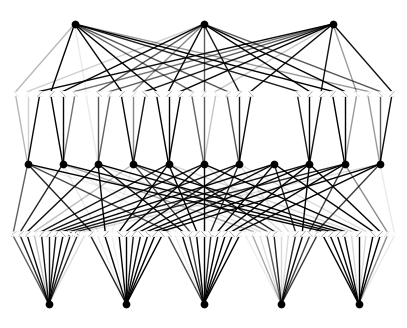

In [ ]:
model.plot()

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with tanh, r2=0.9929715823194873
fixing (0,0,1) with log, r2=0.9985356534347845
fixing (0,0,2) with sqrt, r2=0.9983858700606484
fixing (0,0,3) with sin, r2=0.997528918813423
fixing (0,0,4) with sin, r2=0.999883186840066
fixing (0,0,5) with tanh, r2=0.9995879621369322
fixing (0,0,6) with tanh, r2=0.9991889636578158
fixing (0,0,7) with sqrt, r2=0.9978981748472515
fixing (0,0,8) with sin, r2=0.9971763356695016
fixing (0,0,9) with sin, r2=0.9881940421856266
fixing (0,0,10) with sin, r2=0.9958422005821442
fixing (0,1,0) with tanh, r2=0.9998777917151923
fixing (0,1,1) with sin, r2=0.9997815940832492
fixing (0,1,2) with sin, r2=0.9999624013930682
fixing (0,1,3) with tanh, r2=0.9987149732589208
fixing (0,1,4) with tanh, r2=0.9999748880190067
fixing (0,1,5) with tanh, r2=0.9999812893485832
fixing (0,1,6) with tanh, r2=0.9999399248706182
fixing (0,1,7) with log, r2=0.9999606828685224
fixing (0,1,8) with tanh, r2=0.9999900502999259
fixing (0,1,9) with sin, r2=0.9999345535363686
fix

In [ ]:
formula1 = model.symbolic_formula()[0]

In [ ]:
formula1[0]

19.17*sqrt(-0.62*(1 - 0.07*x_3)**2 + 0.01*sin(1.2*x_1 - 5.59) - 0.07*tanh(0.55*x_2 - 1.6) + 0.04*tanh(0.69*x_4 - 0.2) + 1) + 17.54*log(0.11*sin(1.35*x_4 + 3.43) + 0.37*tanh(0.62*x_1 - 4.4) + 0.42*tanh(0.43*x_2 - 1.07) - 1.01*tanh(0.24*x_3 - 0.2) + 7.790039) + 2028.53*sin(0.03*(1 - 0.06*x_3)**2 - 0.02*tanh(0.23*x_4 + 0.6) + 0.1) + 11.34*sin(0.01*sqrt(0.29*x_1 - 1) + 0.01*sin(0.46*x_2 + 4.8) - 0.03*sin(0.19*x_3 - 0.76) - 0.21) - 805.34*sin(0.01*sin(0.46*x_2 + 7.85) + 0.06*sin(0.16*x_3 - 6.82) + 0.01*tanh(0.61*x_4 - 0.87) + 0.08) - 0.12*sin(0.03*sqrt(0.38*x_1 - 1) + 0.04*log(2.04*x_2 + 6.94) - 0.11*tanh(0.15*x_3 - 0.6) - 0.02*tanh(0.78*x_4 - 1.31) + 0.060786848742282) + 0.04*Abs(196.21*(0.06*x_3 - 1)**2 + 2.22*sin(1.91*x_4 + 2.13) + 22.7*tanh(0.24*x_1 - 2.0) + 35.55*tanh(0.45*x_2 - 1.34) - 96.6559907048941) + 0.29*Abs(2.05*sin(0.8*x_1 + 0.63) + 0.44*tanh(1.23*x_2 - 3.2) + 13.31*tanh(0.25*x_3 - 1.3) + 5.97*tanh(0.87*x_4 - 1.62) + 27.3967664167285) + 0.14*Abs(11.05*log(4.25*x_1 - 9.74) + 4.

In [ ]:
formula1[1]

-0.000235827283234158*(0.0526889835786295*sqrt(0.38*x_1 - 1) + 0.069820803321779*log(2.04*x_2 + 6.94) - 0.209409343682395*tanh(0.15*x_3 - 0.6) - 0.0389699015603544*tanh(0.78*x_4 - 1.31) - 1)**3 + 64.36*sin(0.24*(1 - 0.07*x_3)**2 + 0.03*tanh(0.55*x_2 - 1.6) - 0.02*tanh(0.69*x_4 - 0.2) - 0.71) + 566.26*sin(0.01*sin(0.46*x_2 + 7.85) + 0.06*sin(0.16*x_3 - 6.82) + 0.01*tanh(0.61*x_4 - 0.87) - 0.e-2) - 429.74*sin(0.11*(1 - 0.06*x_3)**2 - 0.e-2*sin(0.38*x_1 - 2.01) + 0.01*tanh(0.45*x_2 - 1.36) - 0.05*tanh(0.23*x_4 + 0.6) + 0.14) + 8928.82*tanh(0.01*tanh(0.62*x_1 - 4.4) + 0.01*tanh(0.43*x_2 - 1.07) - 0.02*tanh(0.24*x_3 - 0.2) - 2.57983) + 8874.88612230634

In [ ]:
formula1[2]

76.67*sin(0.01*sin(0.46*x_2 + 7.85) + 0.06*sin(0.16*x_3 - 6.82) + 0.01*tanh(0.61*x_4 - 0.87) + 0.2) + 464.01*sin(-0.1*(1 - 0.06*x_3)**2 + 0.01*sin(0.38*x_1 - 2.01) - 0.01*tanh(0.45*x_2 - 1.36) + 0.05*tanh(0.23*x_4 + 0.6) + 0.22) + 0.3*sin(-0.01*sqrt(0.38*x_1 - 1) - 0.02*log(2.04*x_2 + 6.94) + 0.06*tanh(0.15*x_3 - 0.6) + 0.01*tanh(0.78*x_4 - 1.31) + 0.231046318505832) - 0.01*Abs(218.5*(0.06*x_3 - 1)**2 + 2.47*sin(1.91*x_4 + 2.13) + 25.28*tanh(0.24*x_1 - 2.0) + 39.59*tanh(0.45*x_2 - 1.34) - 108.775989383459) - 0.1*Abs(5.24*sin(1.35*x_4 + 3.43) + 18.12*tanh(0.62*x_1 - 4.4) + 20.33*tanh(0.43*x_2 - 1.07) - 49.5*tanh(0.24*x_3 - 0.2) + 49.7748445058241) + 0.1*Abs(-304.39*(0.07*x_3 - 1)**2 + 2.72*sin(1.2*x_1 - 5.59) - 33.02*tanh(0.55*x_2 - 1.6) + 22.03*tanh(0.69*x_4 - 0.2) + 0.08*Abs(5.2*x_5 + 10.0) + 243.59) + 0.08*Abs(3.14*sin(1.56*x_1 - 7.2) + 265.73*sin(0.18*x_3 + 2.47) - 36.86*sin(0.9*x_4 + 4.9) + 70.36*tanh(0.27*x_2 - 0.79) - 2.63*Abs(7.0*x_5 + 10.0) - 68.71) + 19541.00977